In [69]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [71]:
# Load the dataset
df = pd.read_csv("heart-disease-data (2).csv")

In [73]:
# Encode categorical features
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

In [75]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

In [77]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [79]:
# Generate linkage matrix for dendrogram
linked = linkage(scaled_data, method='ward')

In [81]:
# Apply Agglomerative Clustering
hac = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = hac.fit_predict(scaled_data)

In [83]:
# Add clusters to the DataFrame
df['cluster'] = clusters

In [85]:
# Example assuming original labels are in 'class_type'
actual_labels = df['target']  # Replace 'target' with the actual column name if different
predicted_labels = df['cluster']

In [87]:

# Compare the actual and predicted labels
comparison = actual_labels == predicted_labels

In [89]:
# Calculate the accuracy (the proportion of correct predictions)
accuracy = comparison.mean()

In [91]:
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.1551


In [93]:
matches = comparison.sum()
mismatches = len(comparison) - matches
print(f'Matches: {matches}')
print(f'Mismatches: {mismatches}')

Matches: 47
Mismatches: 256


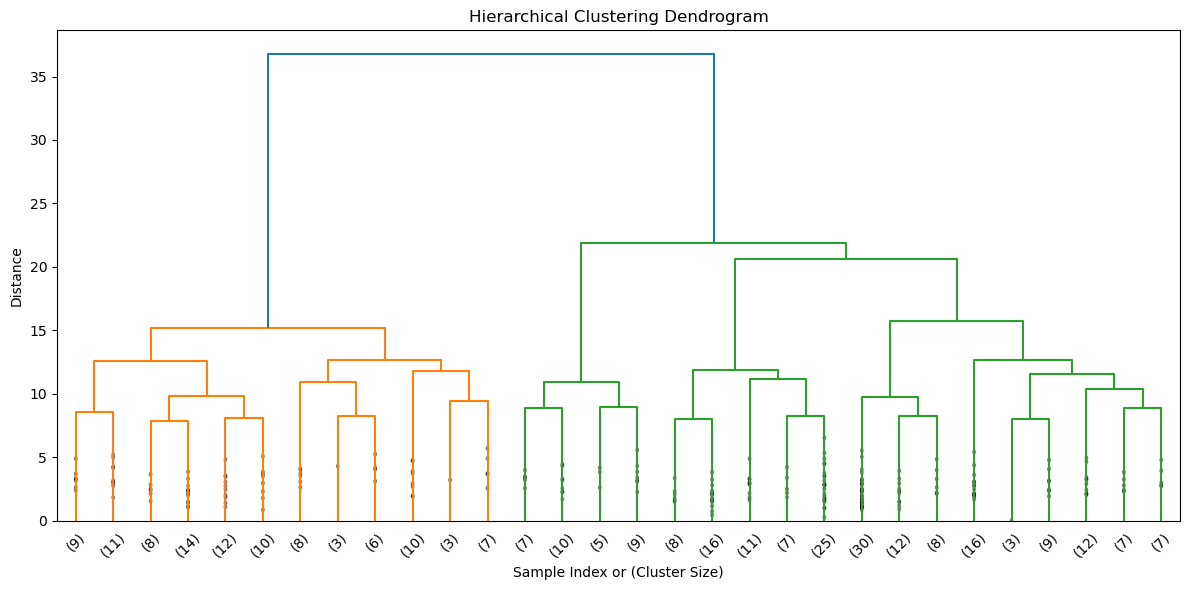

In [95]:
# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=30, show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()